In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#from autocorrect import Speller
# import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

In [74]:
# import unidecode
!pip install Unidecode

In [75]:
import unidecode

In [76]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


### **Twitter Dataset**

In [77]:
data=pd.read_csv("cyberbullying_tweets.csv")

In [78]:
data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


Preprocessing Function

In [79]:
def case_convert(data):
    data.tweet_text = [i.lower() for i in data.tweet_text.values]

def remove_specials(data):
    data.tweet_text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.tweet_text.values]

def remove_shorthands(data):
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.tweet_text = texts



In [80]:
def qcase_convert(data):
    lower_corpus_words = data.lower()
    return lower_corpus_words

def qremove_specials(data):
    data =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data]
    return data

def qremove_shorthands(data):
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data = texts
    return data

def qremove_stopwords(data):
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data = texts
    return data
                
def qremove_links(data):
    texts = []
    splits = data.split()
    for text in splits:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data = texts
    return data

def qremove_accents(data):
    data = [unidecode.unidecode(text) for text in data]
    return data

def qnormalize_spaces(data):
    data = [re.sub(r"\s+"," ",text) for text in data]
    return data

In [81]:
def preprocess(data):
  data = qcase_convert(data)
  data = qremove_links(data)
  data = qremove_shorthands(data)
  data = qremove_accents(data)
  data = qremove_specials(data)
  data = qremove_stopwords(data)
  data = qnormalize_spaces(data)
  str1 = ""
  for ele in data:
      str1 += ele
 
  return str1
  #return data


In [82]:
preprocess("Why is this so retardded wouldn't it'd be easier")

' retardded would would easier'

In [83]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhuvaneswar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(data):
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.tweet_text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data.tweet_text = texts
                
def remove_links(data):
    texts = []
    for text in data.tweet_text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.tweet_text = texts

def remove_accents(data):
    data.tweet_text = [unidecode.unidecode(text) for text in data.tweet_text.values]

def normalize_spaces(data):
    data.tweet_text = [re.sub(r"\s+"," ",text) for text in data.tweet_text.values]

case_convert(data)
remove_links(data)
remove_shorthands(data)
remove_accents(data)
remove_specials(data)
remove_stopwords(data)
normalize_spaces(data)
print(data)

                                              tweet_text cyberbullying_type
0                words katandandre food crapilicious mkr  not_cyberbullying
1       aussietv white mkr theblock imacelebrityau to...  not_cyberbullying
2       xochitlsuckkks classy whore red velvet cupcakes   not_cyberbullying
3       jason gio meh p thanks heads concerned anothe...  not_cyberbullying
4       rudhoeenglish isis account pretending kurdish...  not_cyberbullying
...                                                  ...                ...
47687   black ppl expected anything depended anything...          ethnicity
47688   turner withhold disappointment turner called ...          ethnicity
47689   swear god dumb nigger bitch got bleach hair r...          ethnicity
47690   yea fuck rt therealexel youre nigger fucking ...          ethnicity
47691   bro u gotta chill rt chillshrammy dog fuck kp...          ethnicity

[47692 rows x 2 columns]


In [85]:
data.tweet_text

0                  words katandandre food crapilicious mkr
1         aussietv white mkr theblock imacelebrityau to...
2         xochitlsuckkks classy whore red velvet cupcakes 
3         jason gio meh p thanks heads concerned anothe...
4         rudhoeenglish isis account pretending kurdish...
                               ...                        
47687     black ppl expected anything depended anything...
47688     turner withhold disappointment turner called ...
47689     swear god dumb nigger bitch got bleach hair r...
47690     yea fuck rt therealexel youre nigger fucking ...
47691     bro u gotta chill rt chillshrammy dog fuck kp...
Name: tweet_text, Length: 47692, dtype: object

In [86]:
lenc = LabelEncoder()
data.cyberbullying_type = lenc.fit_transform(data.cyberbullying_type)

In [87]:
lenc.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [88]:
lenc.classes_[2]

'gender'

In [89]:
data.cyberbullying_type

0        3
1        3
2        3
3        3
4        3
        ..
47687    1
47688    1
47689    1
47690    1
47691    1
Name: cyberbullying_type, Length: 47692, dtype: int32

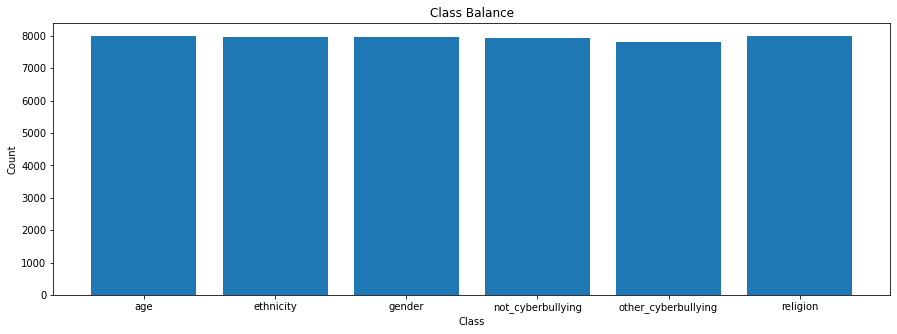

In [90]:
plt.figure(figsize=(15,5))
un, count = np.unique(data.cyberbullying_type.values, return_counts=True)
# plt.bar(lenc.classes_ , (count))
count = count.astype(int)
plt.bar([lenc.classes_[int(i)] for i in un] , (count))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

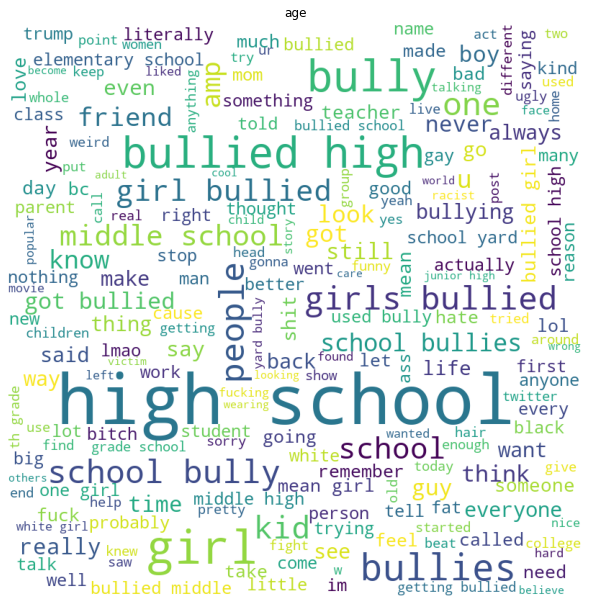

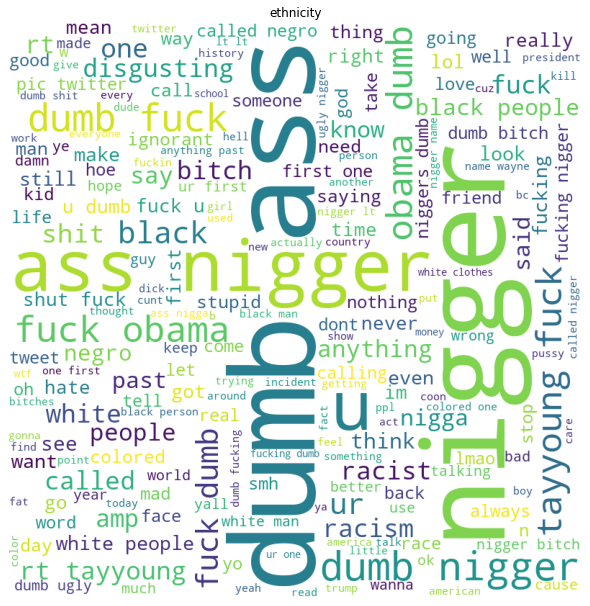

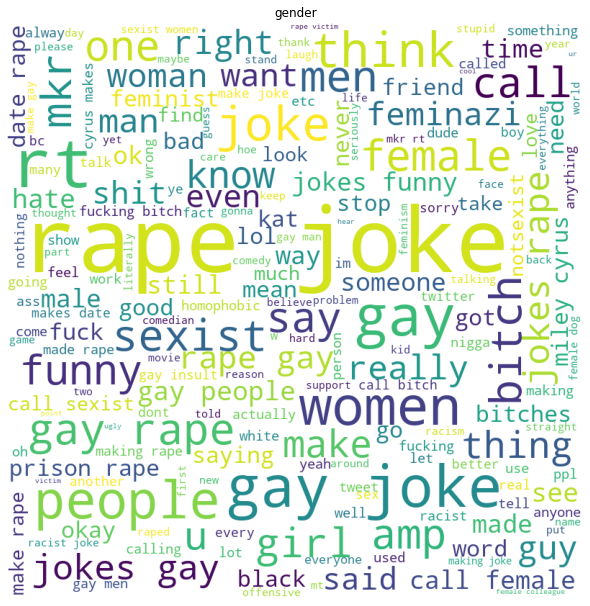

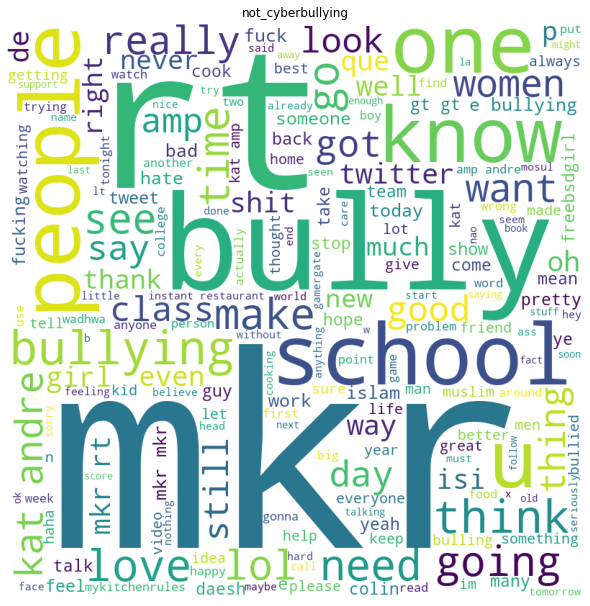

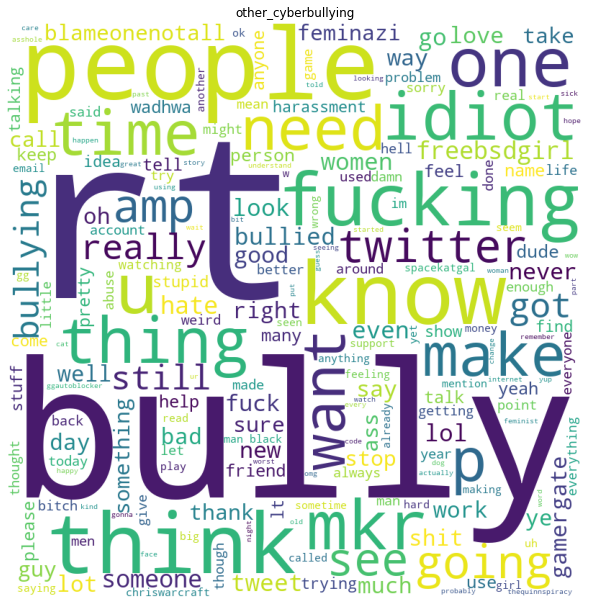

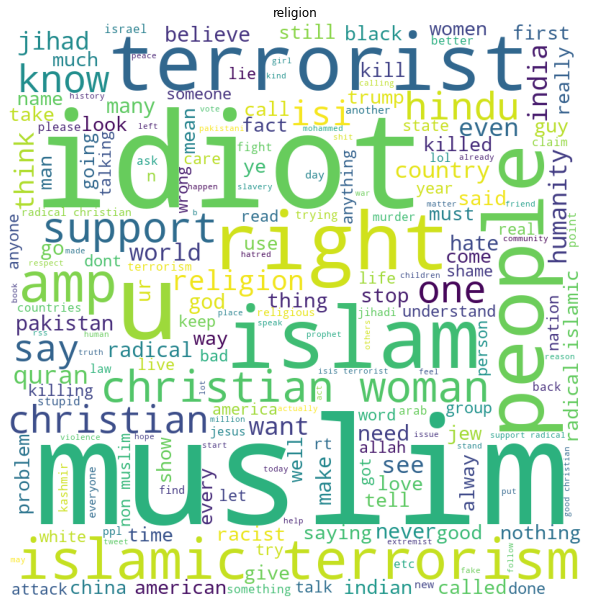

In [91]:
for c in range(len(lenc.classes_)):
    string = ""
    for i in data[data.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

In [92]:
vec = TfidfVectorizer(max_features=3000)

X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(data.tweet_text.values).toarray(),data.cyberbullying_type.values.reshape(-1,1),test_size=0.2,shuffle=True, random_state=42)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
X_train, X_test, y_train, y_test = train_test_split(data.tweet_text.values,data.cyberbullying_type.values.reshape(-1,1), test_size=0.2,shuffle=True, random_state=42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [94]:
#clf = MultinomialNB().fit(X_train_tfidf, y_train)

model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train_tfidf, y_train)

C:\Users\BHUVAN~1\AppData\Local\Temp/ipykernel_19304/2202849386.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

**1) Random Forest Classifier**

In [96]:
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

ValueError: could not convert string to float: ' rt avatastic freebsdgirl also anyone never written x c java lt insert language assignment always ret '

In [ ]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test,average='macro')*100))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train_tfidf), y_train)*100))

Train Accuracy  : 96.80 %


In [ ]:
from getting_text import textList

In [ ]:
print(textList)


["ESPN FC\n@ESPNFC\n·\n14h\nLionel Messi finished with the highest overall player rating in the World Cup, and is currently leading in the Champions League and Ligue 1.\n\nHe's 35 years old \n635\n5,955\n73.4K", 'Football Videos That Go Hard\n@hardfootyvids\n·\n15h\nLionel Messi’s golden foot.\nFrom \n94\n2,020\n31.6K', 'ganesh\n@breathMessi21\n·\n22h\nThe tears will be even more beautiful when Messi wins an another Champions league haha\n110\n472\n9,585', 'Leo Messi\n@WeAreMessi\n·\n11h\nOne week ago, Leo Messi completed football! \n20\n443\n6,417', 'MC\n@CrewsMat10\n·\n11h\nExactly 1 week ago, Lionel Messi won the World Cup.\n17\n402\n6,167']


In [ ]:
bully=[]
for row in textList:
    tweet=row
    prep = preprocess(tweet)
    #print(prep)
    tweet=[tweet]
    print(model.predict(count_vect.transform(tweet)))
    bully.append(int(model.predict(count_vect.transform(tweet))))

[5]
[3]
[4]
[4]
[3]


In [ ]:
print(bully)

[5, 3, 4, 4, 3]


In [ ]:

tweet = "you dumb fucking bitch"

prep = preprocess(tweet)

print(model.predict(count_vect.transform(["Women are bad drivers dumbfucks"])))

[2]


In [ ]:
tweet = "Women are bad drivers dumbfucks"

prep = preprocess(tweet)

inp = [prep]

print(model.predict(count_vect.transform(inp)))

[2]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oneh = OneHotEncoder(handle_unknown="ignore")


tweet = "you dumb fucking bitch"

prep = preprocess(tweet)


In [ ]:
print(model.predict(vec.transform(prep).toarray()))

ValueError: Iterable over raw text documents expected, string object received.

**2) AdaBoost Classifier**

In [ ]:
#ADAboost Classifier

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

model1 = abc.fit(X_train, Y_train)
y_pred = model1.predict(X_test)

In [ ]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(Y_test, y_pred))

print("Precision       : {:.2f} %".format(precision_score(model1.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model1.predict(X_test), Y_test,average='macro')*100))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model1.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model1.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model1.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model1.predict(X_test), Y_test,average='macro')*100))

In [ ]:
!pip install autocorrect

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train,  
    test_size=test_size, random_state=state)

**3) Gradient Boosting Classifier**

In [ ]:
lr_list = [0.05, 0.1, 0.25, 0.5]

for learning_rate in lr_list:
    #gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Best Learning Rate (0.5)


In [ ]:
 gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_depth=2, random_state=0)
 gb_clf.fit(X_train, y_train)

In [ ]:
print("Learning rate: ", 0.5)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

In [ ]:
"""gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)"""
predictions = gb_clf.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

SVM


In [ ]:
import cvxopt
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [ ]:
linear = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovr').fit(X_train, Y_train)

In [ ]:
linear_pred = linear.predict(X_test)

In [ ]:
accuracy_lin = linear.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)

NameError: name 'linear' is not defined

### **Facebook Dataset**


In [ ]:
data_fb = pd.read_csv("facebook_data.csv")

In [ ]:
data_fb

**Preprocessing Function**

In [ ]:
def case_convert(data):
    data.text_message = [i.lower() for i in data.text_message.values]

def remove_specials(data):
    data.text_message =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.text_message.values]

def remove_shorthands(data):
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.text_message.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.text_message = texts



In [ ]:
def remove_stopwords(data):
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.text_message.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data.text_message = texts
                
def remove_links(data):
    texts = []
    for text in data.text_message.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.text_message = texts

def remove_accents(data):
    data.text_message = [unidecode.unidecode(text) for text in data.text_message.values]

def normalize_spaces(data):
    data.text_message = [re.sub(r"\s+"," ",text) for text in data.text_message.values]

In [ ]:
#preprocessing

case_convert(data_fb)
remove_links(data_fb)
remove_shorthands(data_fb)
remove_accents(data_fb)
remove_specials(data_fb)
remove_stopwords(data_fb)
normalize_spaces(data_fb)
print(data_fb)

In [ ]:
lenc = LabelEncoder()
data_fb.cyberbullying_type = lenc.fit_transform(data_fb.label_bullying)

In [ ]:
vec = TfidfVectorizer(max_features=3000)

X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(data_fb.text_message.values).toarray(),data_fb.label_bullying.values.reshape(-1,1),test_size=0.2,shuffle=True, random_state=42)

**1) Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

In [ ]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test,average='macro')*100))

**2) Gradient Boost Classifier**

In [ ]:
lr_list = [0.05, 0.1, 0.25, 0.5]

for learning_rate in lr_list:
    #gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

Best Learning Rate

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_depth=2, random_state=0)
gb_clf.fit(X_train, Y_train)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))

In [ ]:
predictions = gb_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))

In [ ]:
df